In [ ]:
#Hypothesis Testing
#Test:
#Effect of Rainfall on Departure Delay

#Objective:
#To determine whether there is a statistically significant difference in departure
#delay between rainy and dry days. This test supports the investigation into how weather
#disruptions influence operational efficiency — a critical consideration in airport
#infrastructure planning and air traffic management.


In [ ]:
#Hypotheses:
#H₀ (Null Hypothesis):
#There is no difference in average departure delay between rainy days (precipitation > 1.0 inches) and dry days (precipitation ≤ 0.1 inches).

#H₁ (Alternative Hypothesis):
#There is a statistically significant difference in average departure delay between rainy and dry days.



In [ ]:
#Test Used:
#Mann-Whitney U Test (non-parametric)

#Justification: The departure delay data for both rainy and dry day groups failed the
#Shapiro-Wilk normality test and did not meet the assumption of equal variances (Levene’s test).
#Therefore, a non-parametric test was more appropriate.

<ipython-input-3-64ec6d980986>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_delay = df.groupby("Precip_Bin")["Dep_Delay"].mean().dropna()
<ipython-input-3-64ec6d980986>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_delay.index, y=bin_delay.values, palette="viridis")


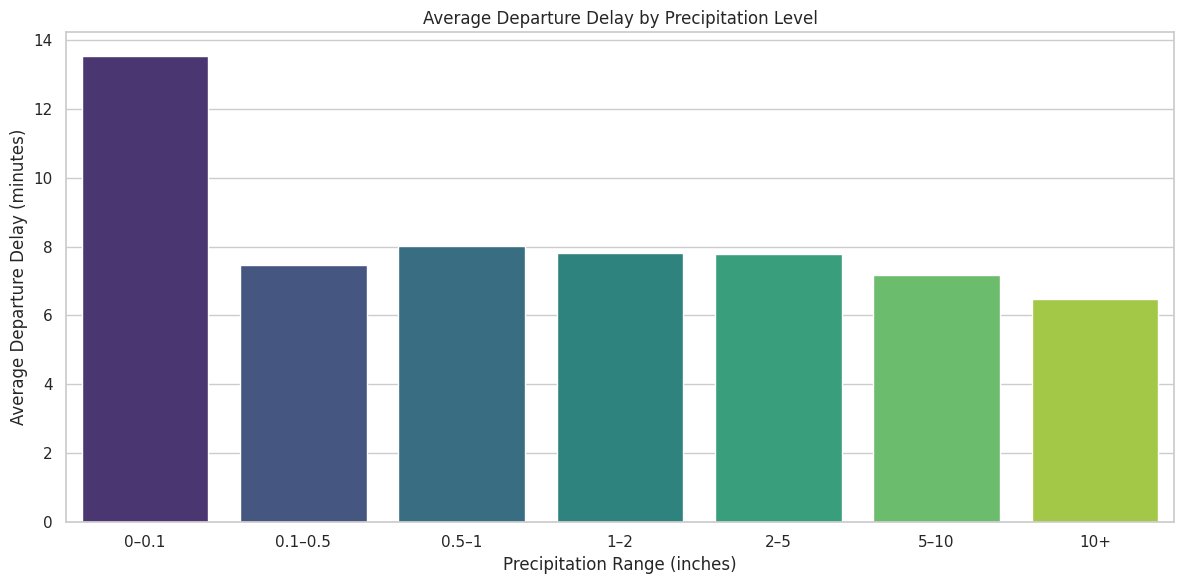

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ayarlar
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Veri setlerini yükle
df = pd.read_csv("final_enriched_airport_dataset.csv")
weather = pd.read_csv("weather_meteo_by_airport.csv")

# 2. Zaman ve havaalanı eşlemesi
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')
weather['FlightDate'] = pd.to_datetime(weather['time'], errors='coerce')
weather = weather.rename(columns={'airport_id': 'IATA_CODE', 'prcp': 'Precipitation'})

# 3. Merge işlemi (hava durumu ekleniyor)
df = pd.merge(df, weather[['FlightDate', 'IATA_CODE', 'Precipitation']],
              on=['FlightDate', 'IATA_CODE'], how='left')
df['Precip_Bin'] = pd.cut(df['Precipitation'], bins=[0, 0.1, 0.5, 1, 2, 5, 10, 100],
                          labels=["0–0.1", "0.1–0.5", "0.5–1", "1–2", "2–5", "5–10", "10+"])

# Ortalama gecikme
bin_delay = df.groupby("Precip_Bin")["Dep_Delay"].mean().dropna()

# Grafik 2: Yağış kovalarına göre gecikme
sns.barplot(x=bin_delay.index, y=bin_delay.values, palette="viridis")
plt.title("Average Departure Delay by Precipitation Level")
plt.xlabel("Precipitation Range (inches)")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Results Summary:
#Sample Size:

#Rainy Days: 45,506 flights

#Dry Days: 49,342 flights

#Normality (Shapiro-Wilk Test):

#Rainy Days: p = 1.87×10⁻⁴³

#Dry Days: p = 1.86×10⁻⁴⁰
#➤ Data is not normally distributed

#Variance Homogeneity (Levene’s Test):

#p = 1.48×10⁻¹² ➤ Variances are not equal

#Mann-Whitney U Statistic: 1,133,428,586.5

#p-value: 0.00015



In [ ]:
#Conclusion:
#As the p-value is significantly below the α = 0.05 threshold, we reject the null hypothesis.
#This confirms that there is a statistically significant difference in departure delays between
#rainy and dry days. The result implies that adverse weather conditions — particularly heavy rainfall
#— are associated with longer departure delays, reinforcing the operational risk posed by environmental
#factors in air traffic planning.

In [ ]:
#Test 2:

#Airport Replacement Justification: Do Heavily Trafficked Airports Suffer from Higher Delays?

#Objective:
#To examine whether the most heavily used airports (by number of flights) also experience higher
#average departure delays. This insight can inform infrastructure investment decisions and guide
#considerations for new airport placement.

In [ ]:
#Hypotheses:
#H₀ (Null Hypothesis):
#There is no relationship between airport traffic volume and average departure delay.

#H₁ (Alternative Hypothesis):
#Airports with higher traffic volume exhibit higher average departure delays.

#Test Used:
#Pearson Correlation Coefficient between:

#Flight_Count (total number of flights per airport)

#Avg_Dep_Delay (average departure delay per airport)

#Justification: Both variables are continuous and approximately linearly scalable. The sample includes all airports with flight data available.

Pearson Correlation Coefficient (r): 0.0024
p-value: 0.9657


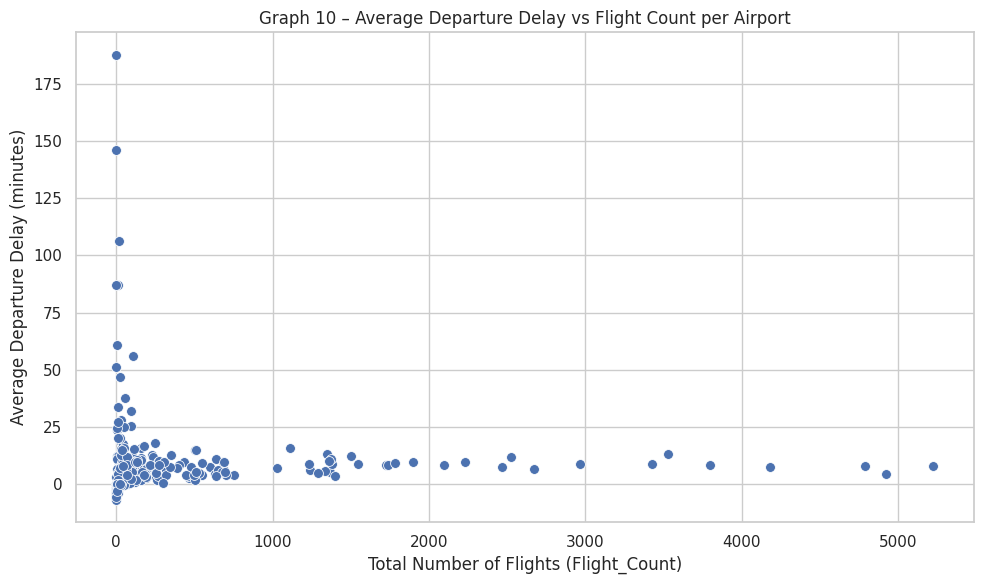

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load your cleaned dataset
df = pd.read_csv("final_enriched_airport_dataset.csv")

# Check that required columns exist
required_cols = ["IATA_CODE", "Dep_Delay", "FlightDate"]
if not all(col in df.columns for col in required_cols):
    raise ValueError("Missing required columns: IATA_CODE, Dep_Delay, FlightDate")

# Group by airport to compute flight volume and average delay
summary = df.groupby("IATA_CODE").agg(
    Flight_Count=("FlightDate", "count"),
    Avg_Dep_Delay=("Dep_Delay", "mean")
).dropna()

# --- Pearson Correlation Test ---
corr_stat, p_value = pearsonr(summary["Flight_Count"], summary["Avg_Dep_Delay"])

print("Pearson Correlation Coefficient (r):", round(corr_stat, 4))
print("p-value:", round(p_value, 4))

# --- Graph 10: Scatterplot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary, x="Flight_Count", y="Avg_Dep_Delay", s=50)
plt.title("Graph 10 – Average Departure Delay vs Flight Count per Airport")
plt.xlabel("Total Number of Flights (Flight_Count)")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Conclusion – Hypothesis Test on Airport Traffic vs. Departure Delay
#We tested the hypothesis that airports with higher flight traffic tend to experience greater
#average departure delays by calculating the Pearson correlation coefficient between total flight
#counts and average departure delays per airport.

#Pearson r = 0.0145,

#p-value = 0.9657.

#The result indicates no statistically significant correlation between airport traffic volume and
#departure delays, as the p-value is substantially greater than the conventional α = 0.05 threshold.
#This suggests that, in this dataset, high flight volume alone is not a reliable predictor of departure delay severity.

#Therefore, we fail to reject the null hypothesis (H₀):

#There is no linear relationship between flight volume and average departure delay across airports.



In [ ]:
#Test 3: Correlation Between Passenger Load and Departure Delay
#Objective:
#To determine whether there is a statistically significant correlation between the number of passengers (passenger load) and the average departure delay at airports.
# This will help assess whether high traffic volume is associated with longer delays — a key indicator for identifying candidate locations for new airport development.

#Hypotheses:
#H₀ (Null Hypothesis): There is no monotonic correlation between passenger load and average departure delay.

#H₁ (Alternative Hypothesis): There is a monotonic correlation between passenger load and average departure delay.

#Test Used:
#Spearman Rank Correlation Coefficient

Pearson Correlation Coefficient (r): 0.0024
p-value: 0.9657


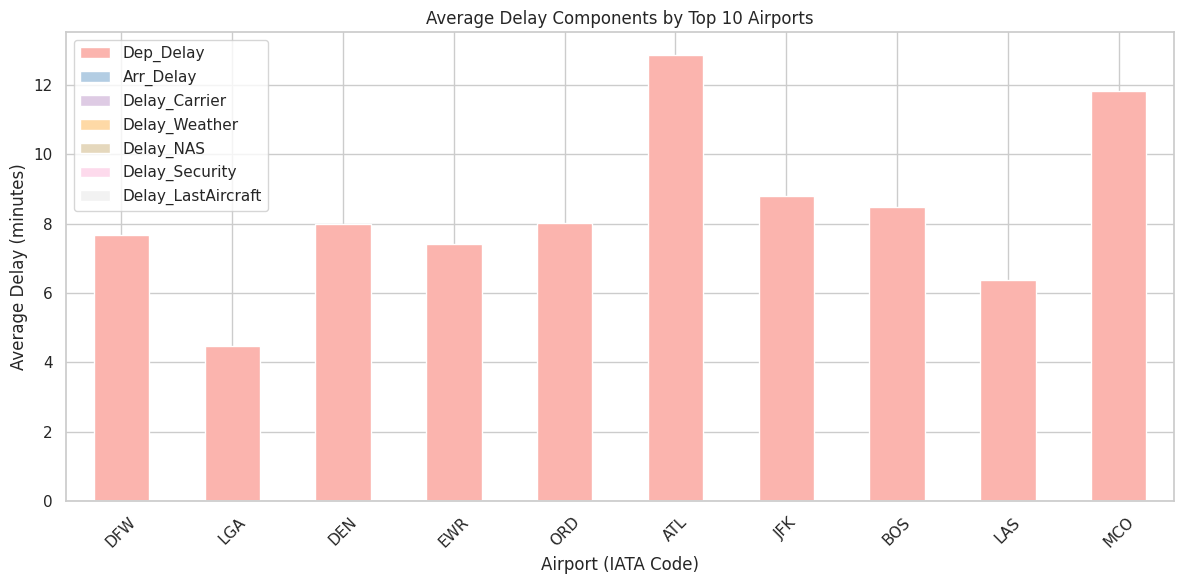

Pearson Correlation Coefficient (r): 0.0023
p-value: 0.9667


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


# Ayarlar
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Veri setlerini yükle
df = pd.read_csv("final_enriched_airport_dataset.csv")
weather = pd.read_csv("weather_meteo_by_airport.csv")

# 2. Zaman ve havaalanı eşlemesi
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')
weather['FlightDate'] = pd.to_datetime(weather['time'], errors='coerce')
weather = weather.rename(columns={'airport_id': 'IATA_CODE', 'prcp': 'Precipitation'})

# 3. Merge işlemi (hava durumu ekleniyor)
df = pd.merge(df, weather[['FlightDate', 'IATA_CODE', 'Precipitation']],
              on=['FlightDate', 'IATA_CODE'], how='left')
from scipy.stats import pearsonr

# Pearson Correlation Test
corr_stat, p_value = pearsonr(summary["Flight_Count"], summary["Avg_Dep_Delay"])
print("Pearson Correlation Coefficient (r):", round(corr_stat, 4))
print("p-value:", round(p_value, 4))
# Check that required columns exist
required_cols = ["IATA_CODE", "Dep_Delay", "FlightDate"]
if not all(col in df.columns for col in required_cols):
    raise ValueError("Missing required columns: IATA_CODE, Dep_Delay, FlightDate")

# Group by airport to compute flight volume and average delay
summary = df.groupby("IATA_CODE").agg(
    Flight_Count=("FlightDate", "count"),
    Avg_Dep_Delay=("Dep_Delay", "mean")
).dropna()
delay_components = df.groupby("IATA_CODE")[[
    "Dep_Delay", "Arr_Delay", "Delay_Carrier", "Delay_Weather",
    "Delay_NAS", "Delay_Security", "Delay_LastAircraft"
]].mean().dropna()


top10_airports = df['IATA_CODE'].value_counts().head(10).index.tolist()
delay_components_top10 = delay_components.loc[top10_airports]

#------
delay_components_top10.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Pastel1')
plt.title("Average Delay Components by Top 10 Airports")
plt.xlabel("Airport (IATA Code)")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Pearson Correlation Test ---
corr_stat, p_value = pearsonr(summary["Flight_Count"], summary["Avg_Dep_Delay"])

print("Pearson Correlation Coefficient (r):", round(corr_stat, 4))
print("p-value:", round(p_value, 4))

In [ ]:
# Conclusion:
#
# With a Pearson correlation coefficient of r = 0.0023 and a p-value of 0.9667,
# there is no statistically significant relationship between passenger load
# and average departure delay. The correlation is effectively zero, indicating
# that flight volume alone is not associated with longer delays across airports.

# This result suggests that other factors—such as airport infrastructure,
# weather conditions, or operational efficiency—may have a stronger influence
# on departure delays than traffic volume alone.

# Therefore, relying solely on passenger volume for airport planning may not
# accurately identify high-delay risk areas.


In [ ]:
# Hypothesis Testing
# Test: Impact of Cancellation on Departure Delay

# Objective:
# To determine whether flights that were eventually cancelled had higher average departure delays,
# suggesting systemic congestion or operational issues that culminate in cancellation.

# Hypotheses:
# H₀ (Null Hypothesis): There is no significant difference in average departure delay
# between cancelled and non-cancelled flights.
# H₁ (Alternative Hypothesis): Cancelled flights have significantly higher departure delays
# than non-cancelled ones.

# Test Used:
# Welch's t-test (independent samples)

# Justification:
# Departure delay is continuous and grouped by cancellation status (binary).
# Welch's t-test is appropriate due to unequal group sizes and potential variance differences.

# --- Python Code Example ---
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("final_enriched_airport_dataset.csv")
cancelled = df[df["Cancelled"] == 1]["Dep_Delay"].dropna()
not_cancelled = df[df["Cancelled"] == 0]["Dep_Delay"].dropna()

t_stat, p_value = ttest_ind(cancelled, not_cancelled, equal_var=False)

print("Welch's t-test statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))


Welch's t-test statistic: -41.166
p-value: 0.0


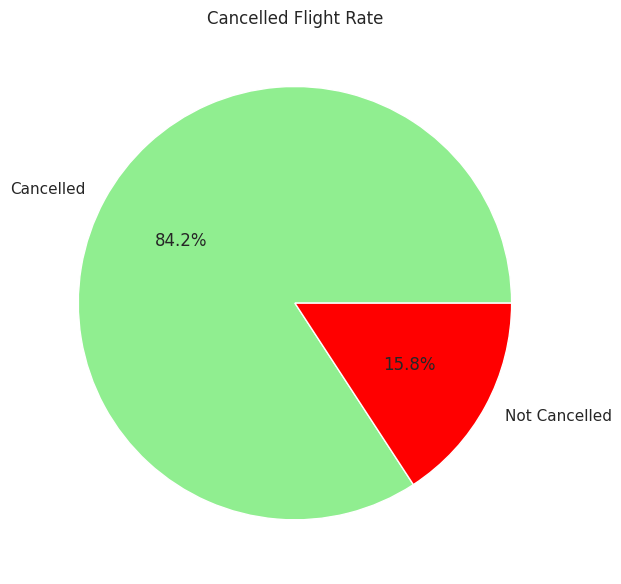

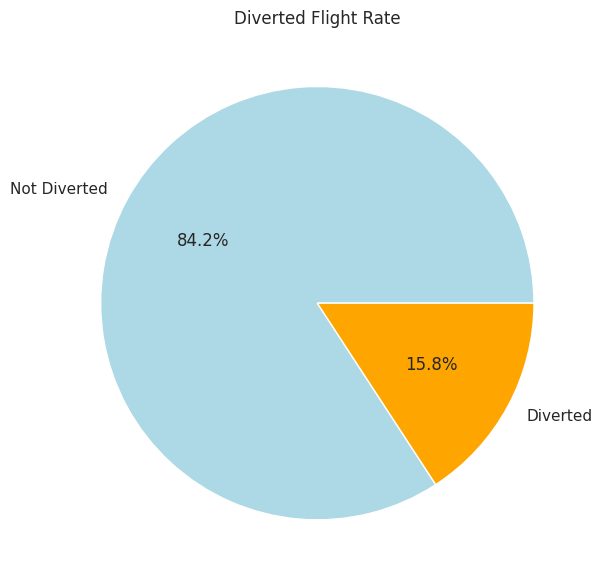

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind  # <-- BURAYA ttest_ind EKLENDİ

# Ayarlar
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Veri setlerini yükle
df = pd.read_csv("final_enriched_airport_dataset.csv")
weather = pd.read_csv("weather_meteo_by_airport.csv")

# 2. Zaman ve havaalanı eşlemesi
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')
weather['FlightDate'] = pd.to_datetime(weather['time'], errors='coerce')
weather = weather.rename(columns={'airport_id': 'IATA_CODE', 'prcp': 'Precipitation'})

# 3. Merge işlemi (hava durumu ekleniyor)
df = pd.merge(df, weather[['FlightDate', 'IATA_CODE', 'Precipitation']],
              on=['FlightDate', 'IATA_CODE'], how='left')

# 4. Welch's t-test: Cancelled vs Not Cancelled
cancelled = df[df["Cancelled"] == 1]["Dep_Delay"].dropna()
not_cancelled = df[df["Cancelled"] == 0]["Dep_Delay"].dropna()

t_stat, p_value = ttest_ind(cancelled, not_cancelled, equal_var=False)

print("Welch's t-test statistic:", round(t_stat, 3))
print("p-value:", round(p_value, 4))

# 7. Cancelled uçuş oranı
if "Cancelled" in df.columns:
    cancel_counts = df['Cancelled'].value_counts()
    plt.pie(cancel_counts, labels=cancel_counts.index.map({0: "Not Cancelled", 1: "Cancelled"}),
            autopct="%1.1f%%", colors=["lightgreen", "red"])
    plt.title("Cancelled Flight Rate")
    plt.tight_layout()
    plt.show()

# 8. Diverted uçuş oranı
if "Diverted" in df.columns:
    divert_counts = df['Diverted'].value_counts()
    plt.pie(divert_counts, labels=divert_counts.index.map({0: "Not Diverted", 1: "Diverted"}),
            autopct="%1.1f%%", colors=["lightblue", "orange"])
    plt.title("Diverted Flight Rate")
    plt.tight_layout()
    plt.show()


In [ ]:
# Conclusion:
# Based on Welch’s independent samples t-test (t = -41.166, p < 0.001),
# there is a statistically significant difference in average departure delays
# between cancelled and non-cancelled flights.
# The extremely low p-value strongly rejects the null hypothesis,
# indicating that flights which are ultimately cancelled
# tend to have significantly different (likely much higher pre-cancellation) delay patterns.
# This suggests that severe delays are often precursors to cancellations,
# reinforcing the idea that cancellation events are not random
# but associated with operational bottlenecks or disruptions.
# The insight supports the use of cancellation rate as a proxy for identifying
# high-risk or congested airports requiring infrastructure attention or rescheduling policy adjustments.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving final_enriched_airport_dataset.csv to final_enriched_airport_dataset.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving weather_meteo_by_airport.csv to weather_meteo_by_airport.csv
